In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [5]:
mall = pd.read_csv("D:/Python/DVDA LAB/viva-5thSem/datasets/Mall_Customers.csv")

In [12]:
print("Head: \t",mall.head(),"\n \n Info:\t",mall.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
Head: 	    CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40 
 
 Info:	 None


In [15]:
x = mall[['Age','Annual Income (k$)', 'Spending Score (1-100)']].values
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [21]:
wcss_list = []
silhouette_scores = []
for i in range(2, 11):
    kmeans_test = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans_test.fit(x_scaled)
    wcss_list.append(kmeans_test.inertia_)
    silhouette_scores.append(silhouette_score(x_scaled, kmeans_test.labels_))

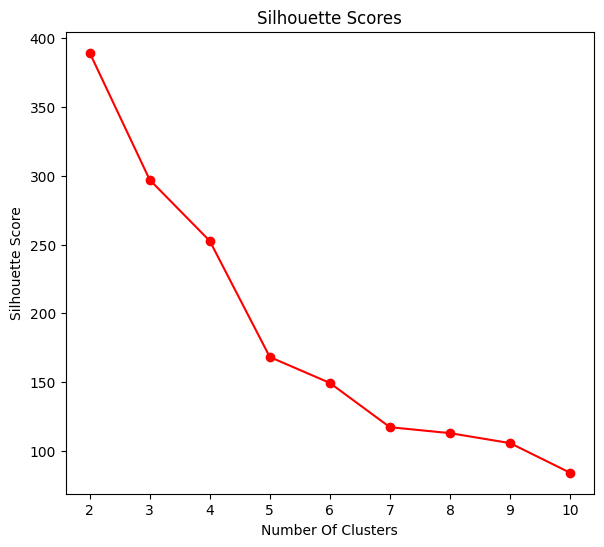

In [30]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(range(2,11), wcss_list, marker='o',color='red')
plt.title('Silhouette Scores')
plt.xlabel('Number Of Clusters')
plt.xticks(np.arange(2,11))
plt.ylabel("Silhouette Score")
plt.show()

In [40]:
optimal_clusters=5
kmeans=KMeans(n_clusters=optimal_clusters,init='k-means++', random_state=0)
y_kmeans=kmeans.fit_predict(x_scaled)

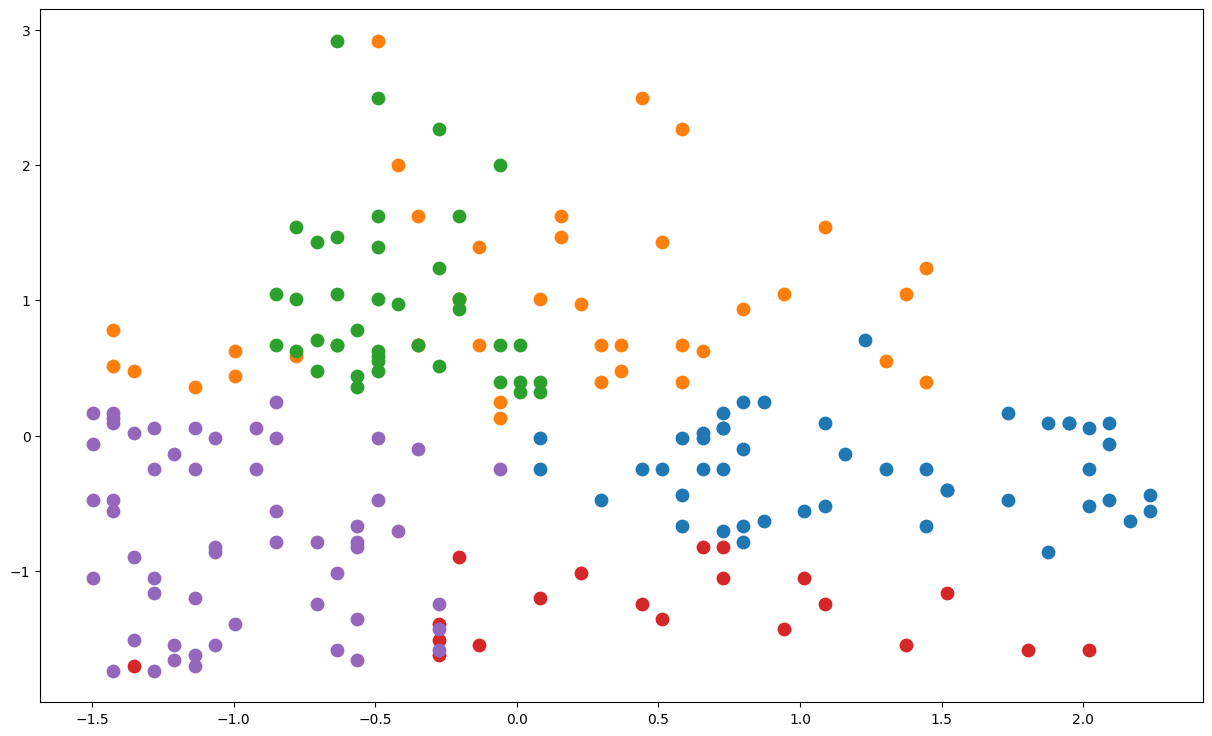

In [41]:
plt.figure(1,figsize=(15,9))
colors=['red','blue','green','cyan','magneta']
for i in range(optimal_clusters):
    plt.scatter(x_scaled[y_kmeans == i,0], x_scaled[y_kmeans==i,1],s=80)

In [42]:
mall["Cluster"] = y_kmeans

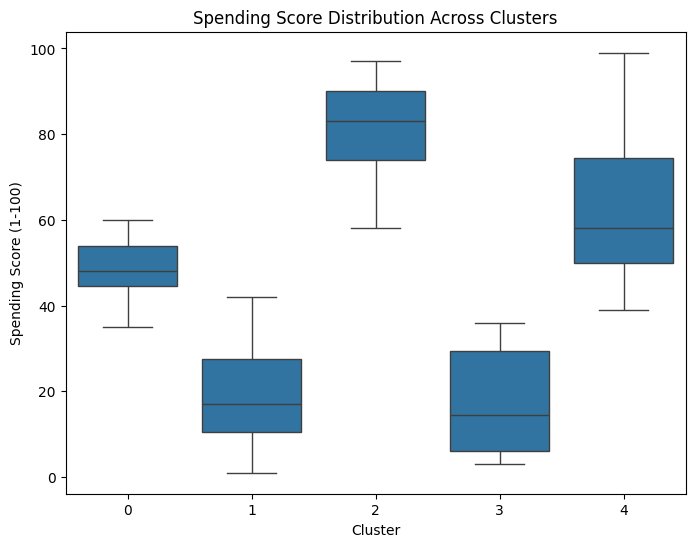

In [46]:
cluster_profile_spending = mall.groupby('Cluster') ['Spending Score (1-100)'].mean()

plt.figure(figsize=(8,6))
sns.boxplot(x='Cluster',y='Spending Score (1-100)', data=mall)
plt.title('Spending Score Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Spending Score (1-100)')
plt.show()

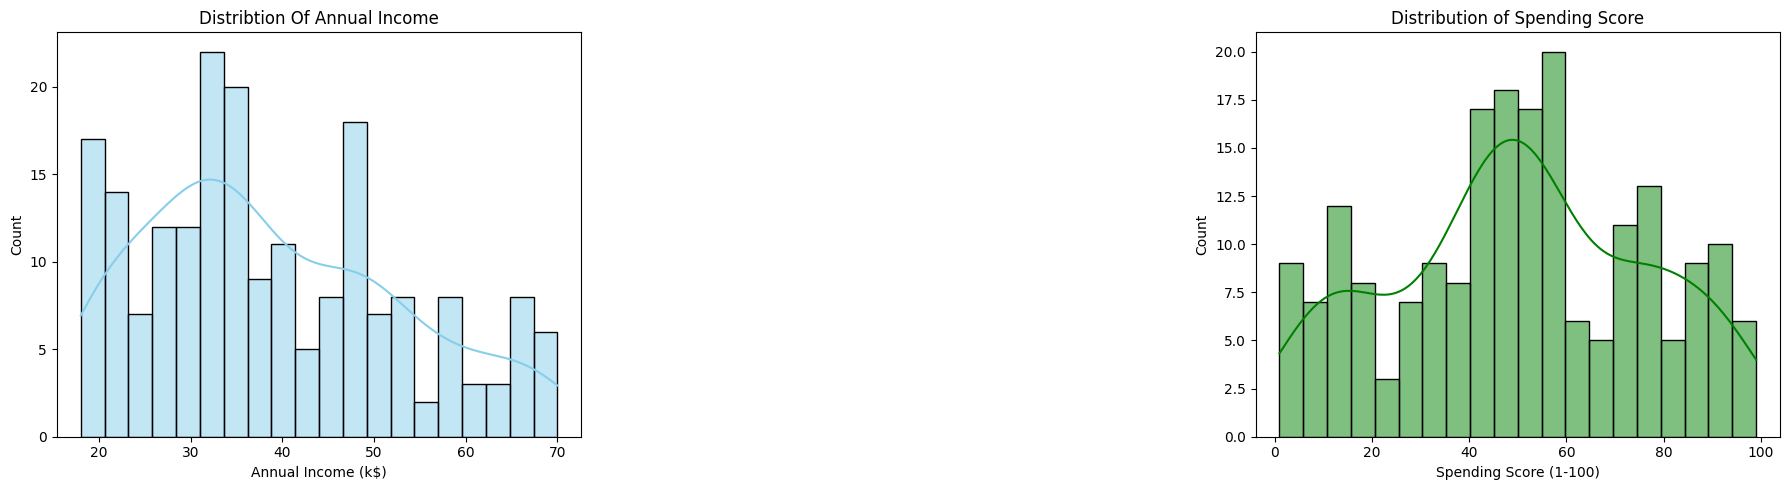

In [49]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.histplot(data=mall, x="Age",bins=20,kde=True , color="skyblue")
plt.title("Distribtion Of Annual Income")
plt.xlabel("Annual Income (k$)")

plt.subplot(1,3,3)
sns.histplot(data=mall,x='Spending Score (1-100)',bins=20,kde=True, color='Green')
plt.title("Distribution of Spending Score")
plt.xlabel("Spending Score (1-100)")
plt.tight_layout()
plt.show()